In [1]:
# #import modules
# import os
# import glob
import pandas as pd
# from datetime import datetime
# os.chdir("D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios\\FinalCrashScenarios")
# all_filenames1 = [i for i in glob.glob('*.{}'.format('csv'))]
# combined_crash_csv = pd.concat([pd.read_csv(f) for f in all_filenames1])

# combined_crash_csv = combined_crash_csv.sample(frac=1).reset_index(drop=True)
# currentDateAndTime = datetime.now()
# currentDateTime = currentDateAndTime.strftime("%d_%m_%Y__%H_%M")
# csvname = "D:\\NewFinalDatasetsForNeuralNetwork\\Encap_25_50_75_crash_noncrash_combined_csv_"+ currentDateTime + ".csv"
# #export to csv
# combined_crash_csv.to_csv(csvname , index=False, encoding='utf-8-sig')

#importing dataset

combined_crash_csv = pd.read_csv("D:\\NewFinalDatasetsForNeuralNetwork\\Encap_25_50_75_crash_combined_csv_20_03_2023__21_52.csv")

In [4]:
max(combined_crash_csv['TTC'])

7.679221757

In [6]:
dataset = combined_crash_csv
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,77.941482,-7.9,0.56,1.361111,5.436994
1,16.298392,-0.8,1.63,1.305556,0.996148
2,60.402328,-5.2,4.16,1.361111,4.198817
3,74.785708,-5.8,3.31,1.111111,5.228723
4,60.219342,-5.7,0.69,1.250000,4.160302
...,...,...,...,...,...
1186515,37.756630,-3.4,4.70,1.333333,2.558604
1186516,29.090621,-2.4,2.35,1.250000,1.921616
1186517,51.400099,-4.4,1.32,1.388889,3.528936
1186518,22.662374,-2.4,1.83,1.305556,1.456062


In [1]:
#import modules
import os
import glob
import pandas as pd
#os.chdir("D:\\CsvToCombine")
filepath = 'D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios'
dataset = pd.read_csv(filepath +'\\Crash_ENCAP50PedDir0.0-5.0_PedDirStep0.1LateralDist0.0-8.0_LateralDistStep0.1-_Dttime090320231312.csv')
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,2.500000,-0.0,0.0,1.388889,0.000000
1,3.500000,-0.1,0.0,1.388889,0.072000
2,4.500000,-0.2,0.0,1.388889,0.144000
3,5.500000,-0.3,0.0,1.388889,0.216000
4,6.500000,-0.4,0.0,1.388889,0.288000
...,...,...,...,...,...
4126,78.125394,-7.6,5.0,1.388889,5.492902
4127,79.120465,-7.7,5.0,1.388889,5.565177
4128,80.115536,-7.8,5.0,1.388889,5.637452
4129,81.110607,-7.9,5.0,1.388889,5.709727


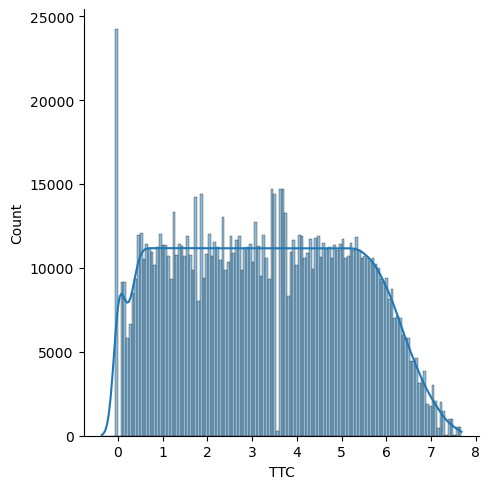

In [7]:
import seaborn as sns
sns.displot(dataset['TTC'], kde = True)

In [8]:
#Splitting TTC from the other columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

# 80-20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# This cell is only used for plotting the training dataset in the below cell, alongwith the column names
joined_train_dataset = X_train
train_dataset = pd.DataFrame(joined_train_dataset, columns = ['NORMALIZED PEDESTRIAN POSITION X', 'NORMALIZED PEDESTRIAN POSITION Y', 'NORMALIZED PEDESTRIAN DIRECTION', 'NORMALIZED PEDESTRIAN SPEED'])
train_dataset.loc[:,'TTC'] = y_train
#print(train_dataset)

In [ ]:
# Dataplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = dataset.corr()
plt.subplots(figsize=(12,9))
k=10
cols = corr_matrix.nlargest(k,'TTC')['TTC'].index
cm = np.corrcoef(train_dataset[cols].values.T)

#sns.heatmap(corr_matrix, vmax=0.9, square=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Plotting the dataset columns to find patterns
sns.pairplot(train_dataset, diag_kind='kde')

In [16]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

# Defining first layer of the neural network, which normalizes the input data on the fly
normalizer_layer = keras.layers.Normalization(axis=-1)
normalizer_layer = layers.Normalization(input_shape=[4,], axis=None)
# Adapting normalizer layer to the input train data shape
normalizer_layer.adapt(np.array(X_train))

# Defines the model and compilation
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      normalizer_layer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  nn_model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['mse'])
  return nn_model

In [17]:
# Building the neural network model and compiling it using the normalization layer adapted to the shape of our input training dataset
regression_model = build_and_compile_model(normalizer_layer)
regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,964
Trainable params: 16,961
Non-trainable params: 3
__________________________________________________

In [18]:
# Report for training data for non linear model
#%%time
history = regression_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    verbose=1,
# Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/50
5933/5933 [==============================] - 34s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 5.5841e-06 - val_mse: 5.5841e-06
Epoch 2/50
5933/5933 [==============================] - 32s 5ms/step - loss: 7.5051e-04 - mse: 7.5051e-04 - val_loss: 8.3694e-04 - val_mse: 8.3694e-04
Epoch 3/50
5933/5933 [==============================] - 31s 5ms/step - loss: 4.5104e-04 - mse: 4.5104e-04 - val_loss: 6.0020e-05 - val_mse: 6.0020e-05
Epoch 4/50
5933/5933 [==============================] - 32s 5ms/step - loss: 3.0340e-04 - mse: 3.0340e-04 - val_loss: 3.8869e-06 - val_mse: 3.8869e-06
Epoch 5/50
5933/5933 [==============================] - 32s 5ms/step - loss: 3.0947e-04 - mse: 3.0947e-04 - val_loss: 1.2791e-05 - val_mse: 1.2791e-05
Epoch 6/50
5933/5933 [==============================] - 31s 5ms/step - loss: 1.7661e-04 - mse: 1.7661e-04 - val_loss: 4.7083e-06 - val_mse: 4.7083e-06
Epoch 7/50
5933/5933 [==============================] - 32s 5ms/step - loss: 1.6881e-04 - mse: 1.6881e

In [ ]:
regression_model.save('TTC_regression_model.h5')

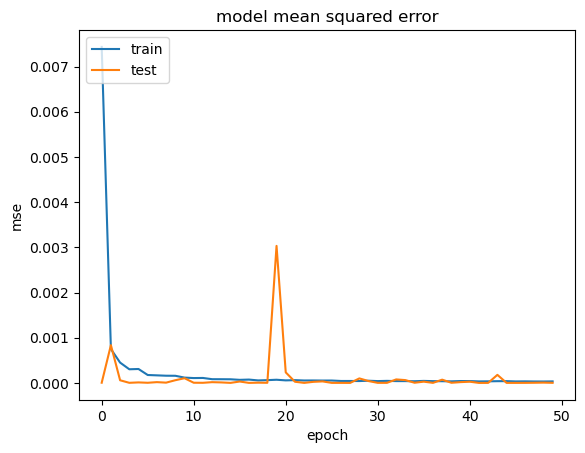

In [20]:
import matplotlib.pyplot as plt
# Summarize history for Loss function
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#Evaluating the model on the test data
regression_model.evaluate(X_test,y_test , verbose=1)

7416/7416 [==============================] - 29s 4ms/step - loss: 3.5509e-06 - mse: 3.5509e-06


[3.550941301000421e-06, 3.550941301000421e-06]

In [22]:
# Plotting Actual TTC values vs. predicted for the test set
def predict_and_plot(dnn_model, X_test, y_test):
    
    tf.data.experimental.enable_debug_mode()
    test_predictions = dnn_model.predict(X_test).flatten()

    a = plt.axes(aspect='equal')
    plt.scatter(y_test,test_predictions)
    plt.xlabel('True Values [TTC]')
    plt.ylabel('Predictions [TTC]')
    lims = [0, 6]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

7416/7416 [==============================] - 35s 5ms/step


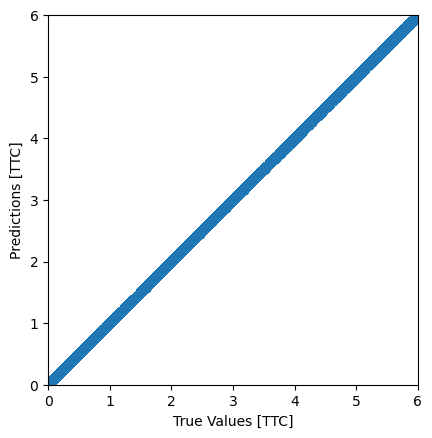

In [23]:
predict_and_plot(regression_model, X_test, y_test)

In [25]:
print(y_test[:20])
prediction = regression_model.predict(X_test[:20])
print(prediction.transpose())

[0.         6.00801572 7.03481077 1.5088958  0.79024449 1.75910666
 4.29048916 1.84398133 2.10000259 0.72052147 0.92187195 2.72568668
 4.99482868 2.84092837 6.1600076  5.6015603  3.69446152 4.85302636
 2.46107008 1.30255052]
1/1 [==============================] - 0s 40ms/step
[[1.8645525e-03 6.0047002e+00 7.0319934e+00 1.5089126e+00 7.9031098e-01
  1.7590077e+00 4.2881031e+00 1.8427330e+00 2.1005831e+00 7.2103155e-01
  9.2232442e-01 2.7254939e+00 4.9936800e+00 2.8418117e+00 6.1586185e+00
  5.5958381e+00 3.6942773e+00 4.8526225e+00 2.4612155e+00 1.3038123e+00]]
